Reading & Splitting Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

run_df = pd.read_csv("Data/run_df.csv")
pass_df = pd.read_csv("Data/pass_df.csv")

# set fraction between 0 and 1 (e.g. 0.05 -> 5% df)
fraction = 1

run_df_sampled = run_df.sample(frac=fraction, random_state=42)
pass_df_sampled = pass_df.sample(frac=fraction, random_state=42)

# Reset the index if needed
run_df_sampled = run_df_sampled.reset_index(drop=True)
pass_df_sampled = pass_df_sampled.reset_index(drop=True)

run_features = run_df_sampled.drop('yards_gained', axis=1)
run_target = run_df_sampled['yards_gained']

pass_features = pass_df_sampled.drop('yards_gained', axis=1)
pass_target = pass_df_sampled['yards_gained']

# Split the data into training and testing sets for runs and passes
run_X_train, run_X_test, run_y_train, run_y_test = train_test_split(run_features, run_target, test_size=0.2, random_state=42)
pass_X_train, pass_X_test, pass_y_train, pass_y_test = train_test_split(pass_features, pass_target, test_size=0.2, random_state=42)




Linear Regression

Run Model Mean Squared Error: 10.982499233975215
Pass Model Mean Squared Error: 17.051328086962986
Run Model Mean Absolute Error: 2.3766198384713295
Pass Model Mean Absolute Error: 3.1605498420396927
Run Model Root Mean Squared Error: 3.313985400386552
Pass Model Root Mean Squared Error: 4.12932537915856


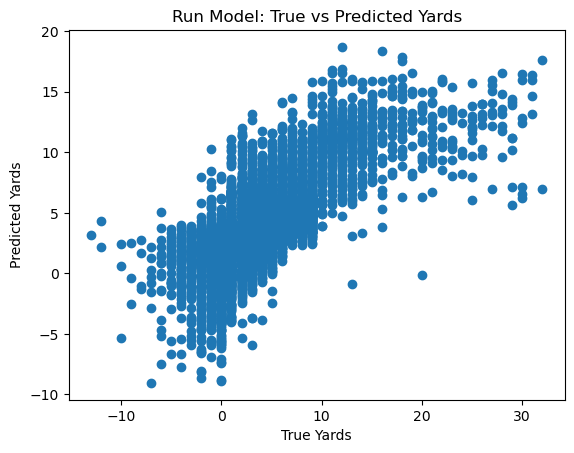

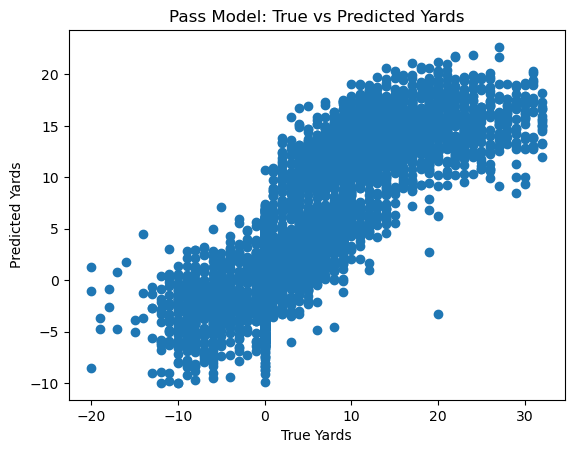

Run Model Cross-Validation Mean Squared Error: 10.87306682699408
Pass Model Cross-Validation Mean Squared Error: 16.866016279247233


In [3]:
run_model = LinearRegression()
run_model.fit(run_X_train, run_y_train)

pass_model = LinearRegression()
pass_model.fit(pass_X_train, pass_y_train)

# Make predictions on the test set
run_predictions = run_model.predict(run_X_test)
pass_predictions = pass_model.predict(pass_X_test)

# Evaluate the models
run_mse = mean_squared_error(run_y_test, run_predictions)
pass_mse = mean_squared_error(pass_y_test, pass_predictions)

run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

run_msa = mean_absolute_error(run_y_test, run_predictions)
pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")
print(f"Run Model Mean Absolute Error: {run_msa}")
print(f"Pass Model Mean Absolute Error: {pass_msa}")
print(f"Run Model Root Mean Squared Error: {run_rmse}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse}")


# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Cross-validation for runs
run_cv_scores = cross_val_score(run_model, run_features, run_target, cv=5, scoring='neg_mean_squared_error')
print(f"Run Model Cross-Validation Mean Squared Error: {-np.mean(run_cv_scores)}")

# Cross-validation for passes
pass_cv_scores = cross_val_score(pass_model, pass_features, pass_target, cv=5, scoring='neg_mean_squared_error')
print(f"Pass Model Cross-Validation Mean Squared Error: {-np.mean(pass_cv_scores)}")

Polynomial Regression

In [ ]:
for degree in [2, 3, 4, 5]:
    run_poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    run_poly_model.fit(run_X_train, run_y_train)
    run_predictions = run_poly_model.predict(run_X_test)

    pass_poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    pass_poly_model.fit(pass_X_train, pass_y_train)
    pass_predictions = pass_poly_model.predict(pass_X_test)

    # Evaluate the models
    run_mse = mean_squared_error(run_y_test, run_predictions)
    pass_mse = mean_squared_error(pass_y_test, pass_predictions)

    print(f"Run Model Mean Squared Error: {run_mse}")
    print(f"Pass Model Mean Squared Error: {pass_mse}")

    # Visualize predictions for runs
    plt.scatter(run_y_test, run_predictions)
    plt.title('Run Model: True vs Predicted Yards for polynomial regression with degree: ' + str(degree))
    plt.xlabel('True Yards')
    plt.ylabel('Predicted Yards')
    plt.show()

    # Visualize predictions for passes
    plt.scatter(pass_y_test, pass_predictions)
    plt.title('Pass Model: True vs Predicted Yards for polynomial regression with degree: ' + str(degree))
    plt.xlabel('True Yards')
    plt.ylabel('Predicted Yards')
    plt.show()
